In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Wyniki 2005/07/11

In [2]:
wyniki_2005 = pd.read_csv("wyniki_wyborow/"+"2005_p"+".csv")
col = wyniki_2005.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2005.columns = col
wyniki_2005['jednostka'] = [ w.replace('O_', '') for w in wyniki_2005['jednostka'] ]
wyniki_2005 = wyniki_2005.fillna(0)

In [4]:
sum2005 = wyniki_2005.set_index('jednostka').sum(1)
sum2005 = sum2005/sum2005[0]
sum2005 = sum2005[1:]

In [6]:
wyniki_2007 = pd.read_csv("wyniki_wyborow/"+"2007_p"+".csv")
col = wyniki_2007.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2007.columns = col
wyniki_2007['jednostka'] = [ w.replace('O_', '') for w in wyniki_2007['jednostka'] ]
wyniki_2007 = wyniki_2007.fillna(0)

In [7]:
sum2007 = wyniki_2007.set_index('jednostka').sum(1)
sum2007 = sum2007/sum2007[0]
sum2007 = sum2007[1:]

In [17]:
wyniki_2011 = pd.read_csv("wyniki_wyborow/"+"2011_O"+".csv")
col = wyniki_2011.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2011.columns = col
wyniki_2011['jednostka'] = [ w.replace('O_', '') for w in wyniki_2011['jednostka'] ]
wyniki_2011 = wyniki_2011.fillna(0)

In [18]:
sum2011 = wyniki_2011.set_index('jednostka').sum(1)
sum2011 = sum2011/sum2011[0]
sum2011 = sum2011[1:]

# 2015

In [19]:
list_excel = []
for i in range(41):
    excel_pd = pd.read_excel('wyniki_wyborow/2015/'+str(i+1).zfill(2)+'.xlsx').fillna(0)
    cols_new = [True if 'Razem KW' in ec else False for ec in excel_pd.columns.values.tolist()]
    cols_new = excel_pd.columns[cols_new]
    excel_pd = excel_pd[cols_new]
    excel_pd = excel_pd.replace(to_replace="XXXXX",value =0) 
    excel_pd = excel_pd.apply(pd.to_numeric)
    excel_pd = excel_pd.sum()
    list_excel.append(excel_pd)
df_2015 = pd.concat(list_excel, axis=1).T.fillna(0)

In [20]:
df_2015

,Razem KW Prawo i Sprawiedliwość,Razem KW Platforma Obywatelska RP,Razem KW Razem,Razem KW KORWiN,Razem KWW „Kukiz'15”,Razem KW Nowoczesna Ryszarda Petru,Razem KWW JOW Bezpartyjni,Razem KWW Zbigniewa Stonogi,Razem KWW Grzegorza Brauna „Szczęść Boże!”,Razem KW Samoobrona,Razem KWW Ruch Społeczny RP,Razem KWW Obywatele do Parlamentu,Razem KWW Mniejszość Niemiecka,Razem KWW Zjednoczeni dla Śląska
0,127370.0,90060.0,13003.0,15427.0,34229.0,25506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,72929.0,76424.0,7984.0,10075.0,20634.0,15544.0,2068.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,163323.0,159582.0,22059.0,27341.0,45726.0,55756.0,0.0,2779.0,1269.0,0.0,0.0,0.0,0.0,0.0
3,113024.0,110948.0,14062.0,17002.0,29080.0,27334.0,0.0,2543.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121703.0,93432.0,13227.0,14134.0,30159.0,23563.0,0.0,2041.0,0.0,772.0,0.0,0.0,0.0,0.0
5,232014.0,80892.0,13395.0,24376.0,45448.0,22158.0,0.0,0.0,1353.0,580.0,599.0,0.0,0.0,0.0
6,163122.0,41823.0,8116.0,14835.0,35567.0,12745.0,0.0,0.0,0.0,628.0,0.0,0.0,0.0,0.0
7,97877.0,97676.0,13825.0,17274.0,30284.0,34586.0,0.0,2258.0,0.0,0.0,0.0,0.0,0.0,0.0
8,107350.0,112333.0,16627.0,17163.0,25992.0,32274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,134134.0,44173.0,8747.0,11160.0,28808.0,15983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
sum2015 = df_2015.sum(1)
sum2015 = sum2015/sum2015.sum()

# 2019

In [22]:
df_2019 = pd.read_csv('wyniki_wyborow/2019_O.csv', delimiter =',').fillna(0)
col = df_2019.columns.values.tolist()
col[0] = 'Województwo'
df_2019.columns = col
select_col=[ 'Województwo',
             'PO',
             'KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19',
             'KORWIN/ Wolnośc/ KONFEDERACJA',
             'PSL',
             'KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19',
             'PiS',
             'KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19',
             'SLD',
             'KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19',
             'KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19']
to_group=['Województwo']
df_2019 = df_2019.loc[df_2019['Województwo'] != 'Województwo', :]
df_2019 = df_2019.loc[df_2019['Województwo'] != 0, :]
df_2019[select_col]
df_2019[select_col[1:]] = df_2019[select_col[1:]].apply(pd.to_numeric)
df_output = df_2019[select_col].groupby(to_group).agg(['sum'])
df_output

,PO,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KORWIN/ Wolnośc/ KONFEDERACJA,PSL,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,PiS,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,SLD,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Województwo,,,,,,,,,,
dolnośląskie,413632,0.0,89440,93803,0.0,525007,0.0,206861,41150.0,0.0
kujawsko-pomorskie,262370,0.0,61031,90722,0.0,350198,0.0,136839,11152.0,0.0
lubelskie,168586,0.0,63451,99078,0.0,552086,0.0,71556,12158.0,0.0
lubuskie,136955,0.0,31490,50943,0.0,150188,0.0,68341,0.0,0.0
mazowieckie,935365,1412.0,212037,261664,0.0,1283424,2503.0,416349,26366.0,0.0
małopolskie,370579,0.0,124631,145751,1765.0,876381,0.0,154467,9214.0,0.0
opolskie,108570,0.0,23176,41901,0.0,152999,0.0,47699,0.0,32094.0
podkarpackie,146949,0.0,75215,76523,0.0,614756,3530.0,62394,0.0,0.0


# Jednostki - województwa - łączenie

In [23]:
df_jednostki = pd.read_csv('dane/_jednostki.csv', sep=';')
df_jednostki.okręgi = [ o.replace(' ', '_') for o in df_jednostki.okręgi ]
df_jednostki.województwo = [ w.upper() for w in df_jednostki.województwo ]
df_jednostki

,nr,okręgi,powiaty,województwo
0,1,Legnica,"powiaty: bolesławiecki, głogowski, jaworski, j...",DOLNOŚLĄSKIE
1,2,Wałbrzych,"powiaty: dzierżoniowski, kłodzki, świdnicki, w...",DOLNOŚLĄSKIE
2,3,Wrocław,"powiaty: górowski, milicki, oleśnicki, oławski...",DOLNOŚLĄSKIE
3,4,Bydgoszcz,"powiaty: bydgoski, inowrocławski, mogileński, ...",KUJAWSKO-POMORSKIE
4,5,Toruń,"powiaty: aleksandrowski, brodnicki, chełmiński...",KUJAWSKO-POMORSKIE
5,6,Lublin,"powiaty: janowski, kraśnicki, lubartowski, lub...",LUBELSKIE
6,7,Chełm,"powiaty: bialski, biłgorajski, chełmski, hrubi...",LUBELSKIE
7,8,Zielona_Góra,województwo lubuskie,LUBUSKIE
8,9,Łódź,powiaty: brzeziński i łódzki wschodni; miasto ...,ŁÓDZKIE
9,10,Piotrków_Trybunalski,"powiaty: bełchatowski, opoczyński, piotrkowski...",ŁÓDZKIE


In [24]:
klucz = df_jednostki[['nr','województwo']]
woj_set = set(klucz['województwo'])
years = ['jednostka']+[str(w) for w in np.arange(2001,2019).tolist()]

In [25]:
df_jednostki.columns = ['nr','jednostka','powiaty','województwo']

# Dane statystyczne

In [2]:
features = [['155055', 'emeryci_i_rencisci'], #przeciętna liczba emerytów i rencistów ogółem (NUTS-2)
            ['33507', 'bezrobocie_zarejsestrowane'], #Bezrobotni zarejestrowani ogółem (P)
            ['10514', 'bezrobocie_zarejsestrowane_gminy'], #Bezrobotni zarejestrowani ogółem (G, 2003-)
            ['58', 'malzenstwa_zawarte'], # (G)
            ['60559', 'ludnosc_na_1km2'], #(G, 2002 -)
            ['76037', 'dochody_gminy'], # (G)
            ['76973','dochody_na_mieszkanca'], #(G, 2002-)
            ['479300', 'wyksztalcenie_wyzsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            ['478931', 'wyksztalcenie_gim_pod_nizsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            ['478929', 'wyksztalcenie_srednie' ], #(NUTS 2)  średnie (łącznie ze średnim zawodowym i ogólnokształcącym); Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.)            
            ['35039', 'rozwody_powiat'], # (P)
            ['60567', 'udzial_wiek_przedprodukcyjny'], # (G, 2002 -) Udział ludności wg ekonomicznych grup wieku w % ludności ogółem, przedprodukcyjny
            ['60566', 'udzial_wiek_produkcyjny'], # (G, 2002 -) produkcyjny
            ['60565', 'udzial_wiek_poprodukcyjny'], # (G, 2002 -) postprodukcyjny
            ['216969', 'praca_najemna'], # (NUTS 2) Przeciętny miesięczny dochód rozporządzalny na 1 osobę"
            ['216971', 'praca_wlasny_rachunek'], # (NUTS 2) 
            ['519999', 'socjal_500plus'], # (NUTS 2, 2016 -) 
            ['216972', 'socjal'], # (NUTS 2)
            ['458417', 'dochody_brutto_na_mieszkanca'], # (NUTS 2) dochody do dyspozycji brutto na 1 mieszkańca
            ['458421', 'PKB_na_1_mieszkanca'],  # (NUTS 2)
            #['458430', 'PKB_na_1_mieszkanca_ceny_stale'],  # (NUTS 2)
            ['58559', 'przestepstwa_ogolem'] # (NUTS 3, powiaty, 2002 -)
            ]

In [3]:
features_list = {}
for f in features:
    temp_df = pd.read_csv("dane/"+f[1]+".csv", sep=',')
    if(f[1] == 'PKB_na_1_mieszkanca'):
        f_tmp = pd.read_csv("dane/PKB_na_1_mieszkanca_szacunki.csv", sep=',')
        temp_df['2018'] = f_tmp['2018']
    features_list[f[1]] = temp_df.loc[temp_df['jednostka'].isin(woj_set), years].reset_index() 
    del features_list[f[1]]['index'] 

NameError: name 'woj_set' is not defined

## Łączenie danych po latach

In [32]:
df_years = {}
for y in years[1:]:
    f = features[0]
    df_years[y] = features_list[f[1]].loc[:,['jednostka']]
    for f in features:
        df_y = features_list[f[1]].loc[:,['jednostka',y]]
        df_y.columns = ['jednostka',f[1]]
        df_years[y] = df_years[y].merge(df_y,how='outer',on=['jednostka'])
    df_years[y].to_csv('dane_years/'+y+'.csv', index = False)

## Przykład łaczenia i agregacji

In [ ]:
# Łaczenie
wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])
# aggregacja
wyn_05.groupby('województwo').agg({'PO': np.mean, 'PIS': np.mean}).reset_index()

#### Przykład z jednymi danymi

In [11]:
emeryci_i_rencisci = pd.read_csv("dane/"+"emeryci_i_rencisci"+".csv", sep=',')
emeryci_i_rencisci_2005 = emeryci_i_rencisci[['jednostka', '2001' , '2002', '2003', '2004']]
emeryci_i_rencisci_2005.columns = ['jednostka', 'eir_2001' , 'eir_2002', 'eir_2003', 'eir_2004']

In [14]:
wyniki_2005['PIS'] = wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']/(wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']+wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP'])
wyniki_2005['PO'] = wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP']/(wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']+wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP'])
wyniki_2005 = wyniki_2005[['jednostka', 'PO', 'PIS']]

In [20]:
wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])
wyn_05 = wyn_05[['jednostka', 'PO', 'PIS', 'województwo']]
wyn_05 = wyn_05.groupby('województwo').agg({'PO': np.mean, 'PIS': np.mean}).reset_index()

In [20]:
wyn_05_eir = wyn_05 .merge(emeryci_i_rencisci_2005,how='inner',left_on=['województwo'],right_on=['jednostka'])
wyn_05_eir = wyn_05_eir.set_index('województwo').drop(['jednostka'], axis = 1)
wyn_05_eir

,PO,PIS,eir_2001,eir_2002,eir_2003,eir_2004
województwo,,,,,,
DOLNOŚLĄSKIE,0.530790,0.469210,688366.0,679217.0,675162.0,674851.0
KUJAWSKO-POMORSKIE,0.454183,0.545817,469368.0,465129.0,464483.0,466143.0
LUBELSKIE,0.375721,0.624279,591238.0,583287.0,576247.0,572526.0
LUBUSKIE,0.514617,0.485383,234017.0,230793.0,228805.0,228222.0
MAZOWIECKIE,0.361173,0.638827,1169706.0,1162884.0,1161704.0,1166887.0
MAŁOPOLSKIE,0.395179,0.604821,800306.0,783214.0,773596.0,768948.0
OPOLSKIE,0.541453,0.458547,214393.0,214031.0,213771.0,214176.0
PODKARPACKIE,0.306032,0.693968,500389.0,496365.0,493847.0,492628.0
PODLASKIE,0.348944,0.651056,287700.0,284768.0,283386.0,282145.0


In [21]:
corr = wyn_05_eir.corr()
corr.style.background_gradient(cmap='coolwarm')

,PO,PIS,eir_2001,eir_2002,eir_2003,eir_2004
PO,1,-1,-0.166713,-0.163148,-0.159146,-0.155614
PIS,-1,1,0.166713,0.163148,0.159146,0.155614
eir_2001,-0.166713,0.166713,1,0.999923,0.999742,0.999476
eir_2002,-0.163148,0.163148,0.999923,1,0.999941,0.99978
eir_2003,-0.159146,0.159146,0.999742,0.999941,1,0.999946
eir_2004,-0.155614,0.155614,0.999476,0.99978,0.999946,1


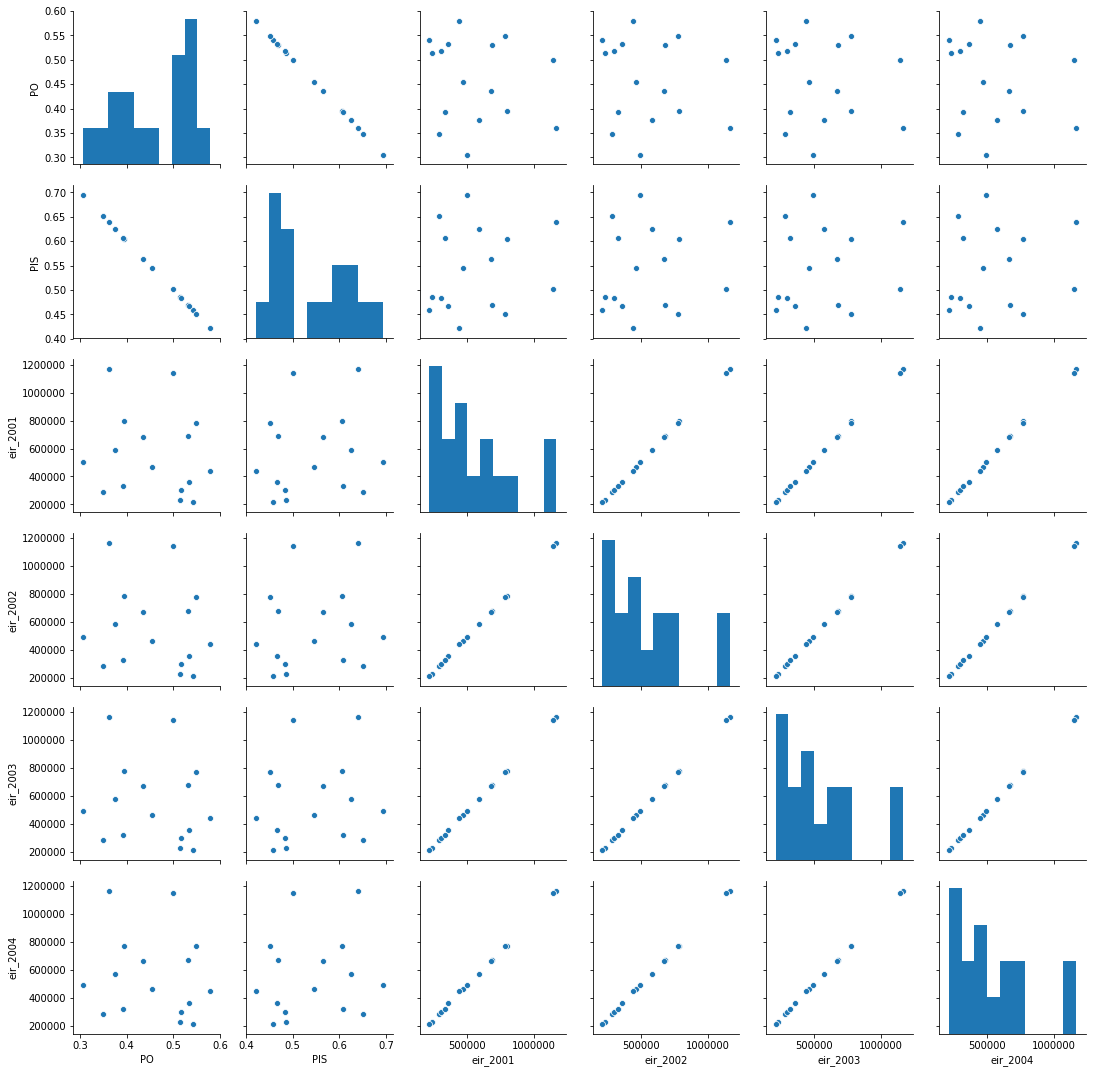

In [22]:
sns.pairplot(wyn_05_eir)

## Percent of votes each year

In [26]:
sum2011

jednostka
Kalisz                  0.023578
Radom                   0.017992
Gdynia                  0.031583
Wałbrzych               0.015695
Kraków                  0.016658
Legnica                 0.023951
Gliwice                 0.019568
Katowice                0.028026
Piotrków_Trybunalski    0.018173
Sieradz                 0.023654
Toruń                   0.024473
Opole                   0.022246
Nowy_Sącz               0.019405
Warszawa_I              0.070814
Bydgoszcz               0.025584
Krosno                  0.020740
Płock                   0.019243
Bielsko-Biała           0.021675
Kielce                  0.030127
Koszalin                0.014965
Lublin                  0.032023
Zielona_Góra            0.023150
Warszawa_II             0.031308
Poznań                  0.027837
Chełm                   0.022125
Łódź                    0.025211
Konin                   0.018227
Częstochowa             0.015623
Chrzanów                0.035254
Sosnowiec               0.019508


In [41]:
p11 = (df_jednostki
 .merge(sum2011.to_frame(),how='outer',on=['jednostka'])
 [['województwo',0]]
 .groupby(['województwo'])
 .sum()
 .rename(columns={0:'percent_11'}))

In [42]:
p05 = (df_jednostki
 .merge(sum2005.to_frame(),how='outer',on=['jednostka'])
 [['województwo',0]]
 .groupby(['województwo'])
 .sum()
 .rename(columns={0:'percent_05'}))

In [43]:
p07 = (df_jednostki
 .merge(sum2007.to_frame(),how='outer',on=['jednostka'])
 [['województwo',0]]
 .groupby(['województwo'])
 .sum()
 .rename(columns={0:'percent_07'}))

In [56]:
p15 = (df_jednostki
 .reset_index()
 .merge(sum2015.reset_index(),how='outer',on=['index'])
 [['województwo',0]]
 .groupby(['województwo'])
 .sum()
 .rename(columns={0:'percent_15'}))

In [54]:
p15

,percent_07
województwo,
DOLNOŚLĄSKIE,0.074548
KUJAWSKO-POMORSKIE,0.046204
LUBELSKIE,0.052582
LUBUSKIE,0.022142
MAZOWIECKIE,0.060280
MAŁOPOLSKIE,0.097027
OPOLSKIE,0.022833
PODKARPACKIE,0.056420
PODLASKIE,0.027707


In [59]:
p19 = (df_output
       .sum(1)
       .to_frame()
       .rename(columns={0:'percent_19'}))
p19 = p19/p19.sum()
p19.index = p19.index.str.upper()

<AxesSubplot:>

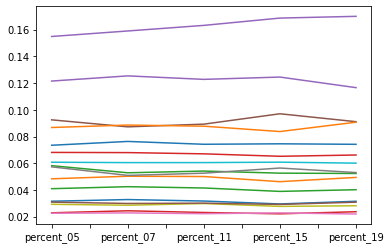

In [72]:
dfs = [p05, p07, p11, p15, p19]
ptotal = pd.concat(dfs, axis=1).fillna(0)
ptotal.loc['MAZOWIECKIE',:] = ptotal.loc['MAZOWIECKIE',:]+ptotal.loc['WARSZAWA',:]
ptotal = ptotal.drop(['WARSZAWA'], axis=0)
ptotal.T.plot(legend=False)

In [78]:
ptotal.mean(1).to_csv('dane_years/voters/percent_voters.csv', header=False)

In [76]:
ptotal.std(1)

DOLNOŚLĄSKIE           0.001070
KUJAWSKO-POMORSKIE     0.001662
LUBELSKIE              0.002426
LUBUSKIE               0.000856
MAZOWIECKIE            0.006370
MAŁOPOLSKIE            0.003699
OPOLSKIE               0.000368
PODKARPACKIE           0.002711
PODLASKIE              0.000849
POMORSKIE              0.000294
WARMIŃSKO-MAZURSKIE    0.001187
WIELKOPOLSKIE          0.002573
ZACHODNIOPOMORSKIE     0.001334
ŁÓDZKIE                0.001225
ŚLĄSKIE                0.003457
ŚWIĘTOKRZYSKIE         0.000715
dtype: float64

## Powiatydane statystyczne

In [4]:
features_p = [['155055', 'emeryci_i_rencisci'], #przeciętna liczba emerytów i rencistów ogółem (NUTS-2)
            ['33507', 'bezrobocie_zarejsestrowane'], #Bezrobotni zarejestrowani ogółem (P)
            #['10514', 'bezrobocie_zarejsestrowane_gminy'], #Bezrobotni zarejestrowani ogółem (G, 2003-)
            ['58', 'malzenstwa_zawarte'], # (G)
            ['60559', 'ludnosc_na_1km2'], #(G, 2002 -)
            #['76037', 'dochody_gminy'], # (G)
            #['76973','dochody_na_mieszkanca'], #(G, 2002-)
            #['479300', 'wyksztalcenie_wyzsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            #['478931', 'wyksztalcenie_gim_pod_nizsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            #['478929', 'wyksztalcenie_srednie' ], #(NUTS 2)  średnie (łącznie ze średnim zawodowym i ogólnokształcącym); Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.)            
            #['35039', 'rozwody_powiat'], # (P)
            #['60567', 'udzial_wiek_przedprodukcyjny'], # (G, 2002 -) Udział ludności wg ekonomicznych grup wieku w % ludności ogółem, przedprodukcyjny
            ['60566', 'udzial_wiek_produkcyjny'], # (G, 2002 -) produkcyjny
            #['60565', 'udzial_wiek_poprodukcyjny'], # (G, 2002 -) postprodukcyjny
            ['216969', 'praca_najemna'], # (NUTS 2) Przeciętny miesięczny dochód rozporządzalny na 1 osobę"
            #['216971', 'praca_wlasny_rachunek'], # (NUTS 2) 
            #['519999', 'socjal_500plus'], # (NUTS 2, 2016 -) 
            ['216972', 'socjal'], # (NUTS 2)
            #['458417', 'dochody_brutto_na_mieszkanca'], # (NUTS 2) dochody do dyspozycji brutto na 1 mieszkańca
            #['458421', 'PKB_na_1_mieszkanca'],  # (NUTS 2)
            #['458430', 'PKB_na_1_mieszkanca_ceny_stale'],  # (NUTS 2)
            ['58559', 'przestepstwa_ogolem'] # (NUTS 3, powiaty, 2002 -)
            ]

In [9]:
years = ['jednostka']+[str(w) for w in np.arange(2001,2019).tolist()]
years

['jednostka',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [10]:
features_list = {}
for f in features_p:
    temp_df = pd.read_csv("dane/"+f[1]+".csv", sep=',')
    if(f[1] == 'PKB_na_1_mieszkanca'):
        f_tmp = pd.read_csv("dane/PKB_na_1_mieszkanca_szacunki.csv", sep=',')
        temp_df['2018'] = f_tmp['2018']
    features_list[f[1]] = temp_df.loc[temp_df['jednostka'].str[:6] == "Powiat", years].reset_index() 
    del features_list[f[1]]['index'] 

In [11]:
features_list

{'emeryci_i_rencisci': Empty DataFrame
 Columns: [jednostka, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
 Index: [],
 'bezrobocie_zarejsestrowane':                jednostka     2001     2002     2003     2004    2005    2006  \
 0       Powiat bocheński   6217.0   5772.0   5616.0   5280.0  4663.0  3438.0   
 1       Powiat krakowski  12465.0  11591.0  11326.0  10376.0  9244.0  7314.0   
 2      Powiat miechowski   3037.0   3098.0   3222.0   2911.0  2675.0  2218.0   
 3      Powiat myślenicki   7361.0   7468.0   7607.0   7174.0  6416.0  4656.0   
 4     Powiat proszowicki   2622.0   2558.0   2472.0   2342.0  2193.0  1895.0   
 ..                   ...      ...      ...      ...      ...     ...     ...   
 377     Powiat węgrowski   6116.0   5772.0   5716.0   5619.0  5449.0  4594.0   
 378     Powiat m.Siedlce   6093.0   5996.0   5621.0   5369.0  5195.0  4546.0   
 379      Powiat grójecki   5087.0   5323.0   4271.0   4156.